In [324]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd

%matplotlib inline

In [325]:
symbol = 'TSLA'
vti_data = yf.Ticker(symbol).history(period="max")
vti_data = vti_data.loc['2022-01-01':'2022-08-30']
vti_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0,0.0
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0,0.0
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0,0.0
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0,0.0
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0,0.0


In [326]:
market_high = vti_data['High'].max()
market_high

402.6666564941406

In [327]:
market_low = vti_data['Low'].min()
market_low

206.85667419433594

In [328]:
from datetime import datetime, timedelta

yesterday = datetime.now() - timedelta(2)
yesterday = datetime.strftime(yesterday, '%Y-%m-%d')

previous_market_close = vti_data.loc[yesterday]['Close']
previous_market_close

277.70001220703125

In [329]:
market_high - market_low

195.8099822998047

In [330]:
abs(market_high - previous_market_close)

124.96664428710938

In [331]:
abs(market_low - previous_market_close)

70.84333801269531

In [332]:
vti_data['high-low'] = vti_data['High'] - vti_data['Low']
vti_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low
Date,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0,0.0,21.676666
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0,0.0,28.316650
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0,0.0,29.776672
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0,0.0,22.500000
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0,0.0,23.643341


In [333]:
vti_data['Previous Close'] = vti_data['Close'].shift(1)
vti_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low,Previous Close
Date,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0,0.0,21.676666,NaN
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0,0.0,28.316650,399.926666
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0,0.0,29.776672,383.196655
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0,0.0,22.500000,362.706665
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0,0.0,23.643341,354.899994


In [334]:
vti_data['high-previous_close'] = vti_data['High'] - vti_data['Previous Close']
vti_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low,Previous Close,high-previous_close
Date,,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0,0.0,21.676666,NaN,NaN
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0,0.0,28.316650,399.926666,2.739990
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0,0.0,29.776672,383.196655,6.916687
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0,0.0,22.500000,362.706665,-0.040009
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0,0.0,23.643341,354.899994,5.410004


In [335]:
vti_data['low-previous_close'] = vti_data['Low'] - vti_data['Previous Close']
vti_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low,Previous Close,high-previous_close,low-previous_close
Date,,,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0,0.0,21.676666,NaN,NaN,NaN
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0,0.0,28.316650,399.926666,2.739990,-25.576660
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0,0.0,29.776672,383.196655,6.916687,-22.859985
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0,0.0,22.500000,362.706665,-0.040009,-22.540009
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0,0.0,23.643341,354.899994,5.410004,-18.233337


In [336]:
vti_data['true_range'] = vti_data[['high-low', 'high-previous_close', 'low-previous_close']].max(axis=1)
vti_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low,Previous Close,high-previous_close,low-previous_close,true_range
Date,,,,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0,0.0,21.676666,NaN,NaN,NaN,21.676666
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0,0.0,28.316650,399.926666,2.739990,-25.576660,28.316650
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0,0.0,29.776672,383.196655,6.916687,-22.859985,29.776672
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0,0.0,22.500000,362.706665,-0.040009,-22.540009,22.500000
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0,0.0,23.643341,354.899994,5.410004,-18.233337,23.643341


In [337]:
vti_data['average_true_range'] = vti_data['true_range'].rolling(window=14).mean()
vti_data.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low,Previous Close,high-previous_close,low-previous_close,true_range,average_true_range
Date,,,,,,,,,,,,,
2022-08-24,297.563324,303.646667,296.500000,297.096680,57259800,0,0.0,7.146667,296.453339,7.193329,0.046661,7.193329,11.575712
2022-08-25,302.359985,302.959991,291.600006,296.070007,53230000,0,3.0,11.359985,297.096680,5.863312,-5.496674,11.359985,11.025473
2022-08-26,297.429993,302.000000,287.470001,288.089996,57163900,0,0.0,14.529999,296.070007,5.929993,-8.600006,14.529999,10.846902
2022-08-29,282.829987,287.739990,280.700012,284.820007,41864700,0,0.0,7.039978,288.089996,-0.350006,-7.389984,7.039978,10.418091
2022-08-30,287.869995,288.480011,272.649994,277.700012,50541800,0,0.0,15.830017,284.820007,3.660004,-12.170013,15.830017,10.536187


In [338]:
vti_data['high_low_avg'] = (vti_data['High'] + vti_data['Low']) / 2
vti_data['lower_band'] = vti_data['high_low_avg'] - (3 * vti_data['average_true_range'])
vti_data['higher_band'] = vti_data['high_low_avg'] + (3 * vti_data['average_true_range'])
vti_data.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,high-low,Previous Close,high-previous_close,low-previous_close,true_range,average_true_range,high_low_avg,lower_band,higher_band
Date,,,,,,,,,,,,,,,,
2022-08-24,297.563324,303.646667,296.500000,297.096680,57259800,0,0.0,7.146667,296.453339,7.193329,0.046661,7.193329,11.575712,300.073334,265.346198,334.800470
2022-08-25,302.359985,302.959991,291.600006,296.070007,53230000,0,3.0,11.359985,297.096680,5.863312,-5.496674,11.359985,11.025473,297.279999,264.203578,330.356419
2022-08-26,297.429993,302.000000,287.470001,288.089996,57163900,0,0.0,14.529999,296.070007,5.929993,-8.600006,14.529999,10.846902,294.735001,262.194295,327.275707
2022-08-29,282.829987,287.739990,280.700012,284.820007,41864700,0,0.0,7.039978,288.089996,-0.350006,-7.389984,7.039978,10.418091,284.220001,252.965729,315.474274
2022-08-30,287.869995,288.480011,272.649994,277.700012,50541800,0,0.0,15.830017,284.820007,3.660004,-12.170013,15.830017,10.536187,280.565002,248.956441,312.173564


In [339]:
candles = vti_data[['Open', 'High', 'Close', 'Low']]
candles.head(5)

,Open,High,Close,Low
Date,,,,
2022-01-03,382.583344,400.356659,399.926666,378.679993
2022-01-04,396.516663,402.666656,383.196655,374.350006
2022-01-05,382.216675,390.113342,362.706665,360.336670
2022-01-06,359.000000,362.666656,354.899994,340.166656
2022-01-07,360.123322,360.309998,342.320007,336.666656


In [340]:
# initiailation values 
start_index = 14
final_upper_band = [vti_data.iloc[start_index - 1]['higher_band']]
final_lower_band = [vti_data.iloc[start_index - 1]['lower_band']]
super_trend = [vti_data.iloc[start_index - 1]['higher_band']]
buy_sells = [None]

super_trend_v2 = [vti_data.iloc[start_index - 1]['higher_band']]

In [341]:
final_upper_band

[388.3250034877232]

In [342]:
final_lower_band

[260.0250026157924]

In [343]:
super_trend

[388.3250034877232]

In [344]:
buy_sells

[None]

In [345]:
for i in range(start_index, len(vti_data.index)):
    current = i
    previous = i - 1
    
    current_basic_upper_band = vti_data.iloc[current]['higher_band']
    current_basic_lower_band = vti_data.iloc[current]['lower_band']
    current_close = vti_data.iloc[current]['Close']
    
    previous_final_upper_band = final_upper_band[-1]
    previous_final_lower_band = final_lower_band[-1]
    previous_super_trend = super_trend[-1]
    previous_close = vti_data.iloc[previous]['Close']
    
    if current_basic_upper_band < previous_final_upper_band or previous_close > previous_final_upper_band:
        final_upper_band.append(current_basic_upper_band)
    else:
        final_upper_band.append(previous_final_upper_band)
        
    
    if current_basic_lower_band > previous_final_lower_band or previous_close < previous_final_lower_band:
        final_lower_band.append(current_basic_lower_band)
    else:
        final_lower_band.append(previous_final_lower_band)
        
        
    current_final_upper_band = final_upper_band[-1]
    current_final_lower_band = final_lower_band[-1]
    
    if previous_super_trend == previous_final_upper_band and current_close < current_final_upper_band:
        buy_sells.append(False)
        super_trend.append(current_final_upper_band)
        
    elif previous_super_trend == previous_final_upper_band and current_close > current_final_upper_band:
        buy_sells.append(True)
        super_trend.append(current_final_lower_band)
        
    elif previous_super_trend == previous_final_lower_band and current_close > current_final_lower_band:
        buy_sells.append(True)
        super_trend.append(current_final_lower_band)
        
    elif previous_super_trend == previous_final_lower_band and current_close < current_final_lower_band:
        buy_sells.append(False)
        super_trend.append(current_final_upper_band)
        
    print(current)
    print(vti_data.iloc[previous])

14
Open                   3.321133e+02
High                   3.348500e+02
Low                    3.135000e+02
Close                  3.146333e+02
Volume                 1.034160e+08
Dividends              0.000000e+00
Stock Splits           0.000000e+00
high-low               2.135001e+01
Previous Close         3.320900e+02
high-previous_close    2.760010e+00
low-previous_close    -1.859000e+01
true_range             2.135001e+01
average_true_range     2.138333e+01
high_low_avg           3.241750e+02
lower_band             2.600250e+02
higher_band            3.883250e+02
Name: 2022-01-21 00:00:00, dtype: float64
15
Open                   3.015867e+02
High                   3.111700e+02
Low                    2.838233e+02
Close                  3.100000e+02
Volume                 1.515657e+08
Dividends              0.000000e+00
Stock Splits           0.000000e+00
high-low               2.734668e+01
Previous Close         3.146333e+02
high-previous_close   -3.463318e+00
low-previous_clo

In [346]:
type(vti_data.loc['2022-01-21':].index)

pandas.core.indexes.datetimes.DatetimeIndex

In [347]:
super_trend_df = pd.DataFrame({
    'final_lower_band': final_lower_band,
    'final_higher_band': final_upper_band,
    'lower_band': vti_data.loc['2022-01-21':]['lower_band'],
    'higher_band': vti_data.loc['2022-01-21':]['higher_band'],
    'super_trend': super_trend,
    'buy_sells': buy_sells,
})
super_trend_df = super_trend_df.set_index(vti_data.loc['2022-01-21':].index)
super_trend_df = super_trend_df.iloc[1:]
super_trend_df.head(10)


,final_lower_band,final_higher_band,lower_band,higher_band,super_trend,buy_sells
Date,,,,,,
2022-01-24,260.025003,362.861677,232.131670,362.861677,362.861677,False
2022-01-25,260.025003,362.861677,246.349047,371.807630,362.861677,False
2022-01-26,260.025003,362.861677,253.431427,377.798584,362.861677,False
2022-01-27,260.025003,359.026435,229.103570,359.026435,359.026435,False
2022-01-28,260.025003,339.491198,210.345472,339.491198,339.491198,False
2022-01-31,260.025003,339.491198,234.538092,365.475244,339.491198,False
2022-02-01,260.025003,339.491198,242.528800,373.704538,339.491198,False
2022-02-02,260.025003,339.491198,238.493565,368.476436,339.491198,False
2022-02-03,260.025003,339.491198,240.255702,365.584294,339.491198,False


In [348]:
buys_line = []
sells_line = []

for i in range(0, len(super_trend_df.index)):
    value = super_trend_df.iloc[i]['super_trend']
    if super_trend_df.iloc[i]['buy_sells']:
        buys_line.append(value)
        sells_line.append(None)
    else:
        sells_line.append(value)
        buys_line.append(None)

/Users/vaibhav/projects/antifragile/venv/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




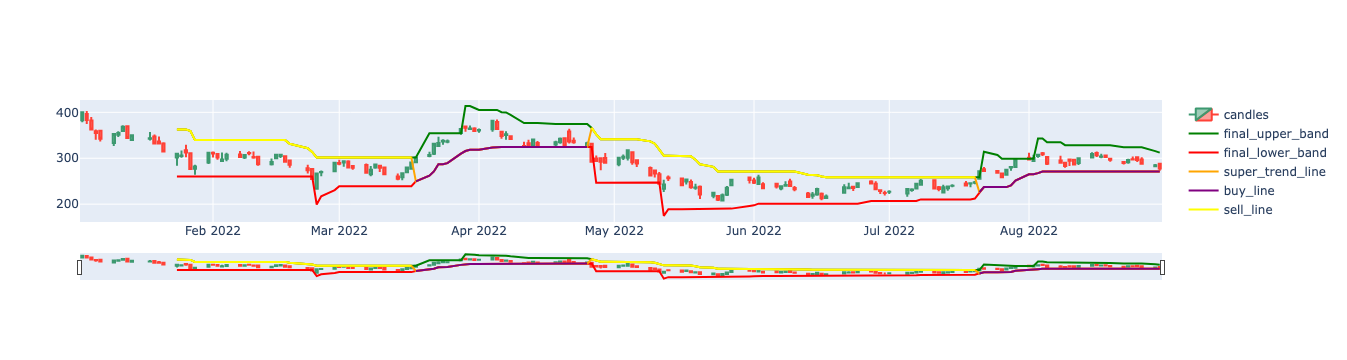

In [349]:

import plotly.graph_objects as go

candlestick = go.Candlestick(
                            name='candles',
                            x=vti_data.index,
                            open=vti_data['Open'],
                            high=vti_data['High'],
                            low=vti_data['Low'],
                            close=vti_data['Close']
                            )

lower_band = go.Line(
    name='lower_band',
    x=super_trend_df.index,
    y=super_trend_df['lower_band'],
    line=dict(color="purple"),
)

higher_band = go.Line(
    name='higher_band',
    x=super_trend_df.index,
    y=super_trend_df['higher_band'],
    line=dict(color="purple"),
)

final_upper_band_line = go.Line(
    name='final_upper_band',
    x=super_trend_df.index,
    y=super_trend_df['final_higher_band'],
    line=dict(color='green'),
)

final_lower_band_line = go.Line(
    name='final_lower_band',
    x=super_trend_df.index,
    y=super_trend_df['final_lower_band'],
    line=dict(color='red'),
)

super_trend_line = go.Line(
    name='super_trend_line',
    x=super_trend_df.index,
    y=super_trend_df['super_trend'],
    line=dict(color='orange')
)

super_trend_line_v2 = go.Scatter(
    name='super_trend_line_v2',
    x=super_trend_df.index,
    y=super_trend_df['super_trend'],
    mode='lines',
    marker=dict(
        color=(
            (super_trend_df.buy_sells)
        ).astype('int'),
        colorscale=[[0, 'yellow'], [1, 'purple']]
    )
)

buy_line = go.Scatter(
    name='buy_line',
    x=super_trend_df.index,
    y=buys_line,
    line=dict(color='purple')
)

sell_line = go.Scatter(
    name='sell_line',
    x=super_trend_df.index,
    y=sells_line,
    line=dict(color='yellow')
)

# trace = go.Scatter(
#     x=df['x'],
#     y=df['y'],
#     mode='markers',
#     marker=dict(
#         size=42,
#         # I want the color to be green if 
#         # lower_limit ≤ y ≤ upper_limit
#         # else red
#         color=(
#             (df.lower_limit < df.y) &
#             (df.y < df.upper_limit)
#         ).astype('int'),
#         colorscale=[[0, 'red'], [1, 'green']]
#     )
# )

# fig = go.Figure(
#     data=[candlestick, lower_band, higher_band, final_upper_band_line, final_lower_band_line, super_trend_line, buy_sells_line]
# )

fig = go.Figure(
    data=[candlestick, final_upper_band_line, final_lower_band_line, super_trend_line, buy_line, sell_line]
)

fig.show()

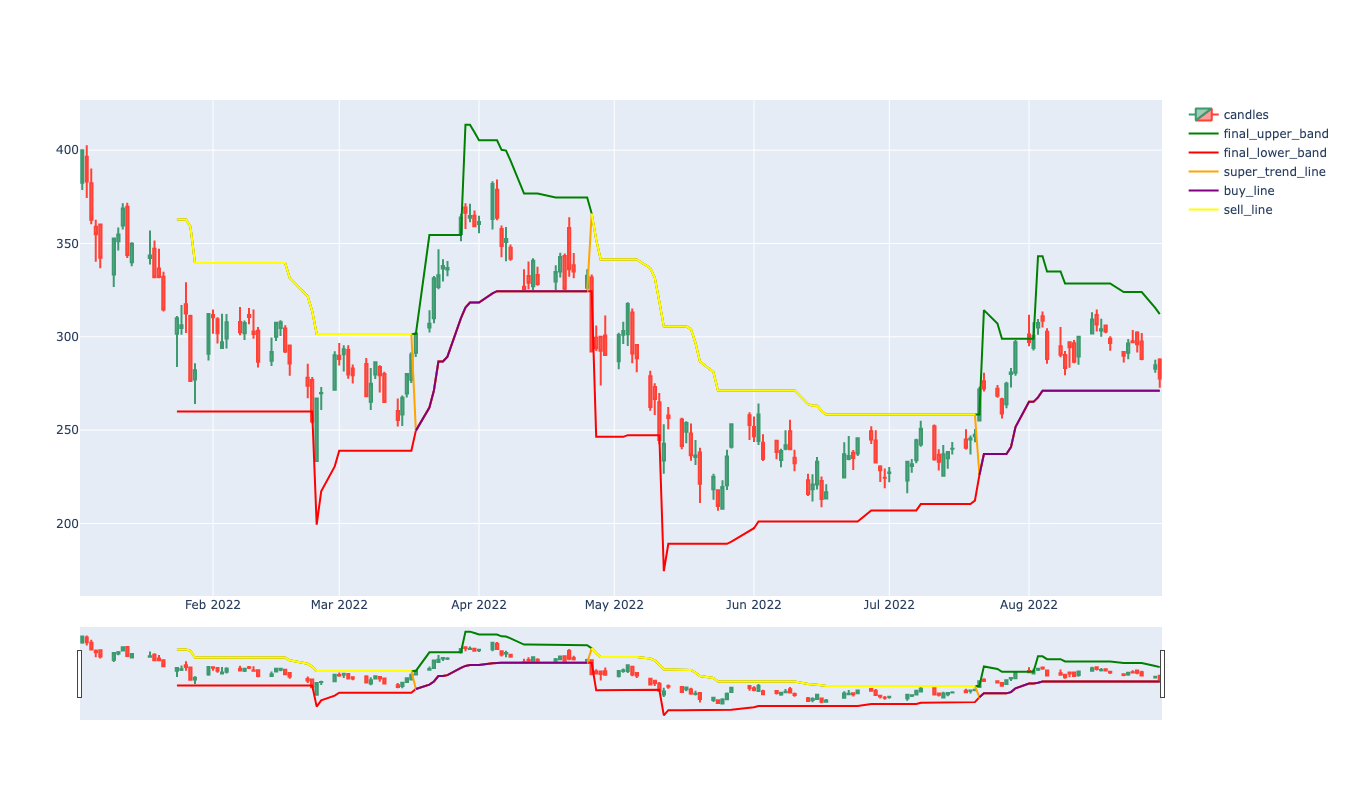

In [352]:
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,)

In [321]:
super_trend_df.loc['2022-04-26']

final_lower_band     324.448818
final_higher_band    366.011429
lower_band           258.988571
higher_band          366.011429
super_trend          366.011429
buy_sells                  True
Name: 2022-04-26 00:00:00, dtype: object